# Example notebook for Focus metric in Image Classification (with imagenet-mini)

In this tutorial, You will see how You can use Focus metric to evaluate explainable algorithm. We will take a pre-trained model, sample images, run explainable methods and evaluate them with focus metrics.

### Setup 

#### Imports

First we have to import all necessary libraries.

In [5]:
import torch
from torch.utils.data import DataLoader
import torchvision

from foxai.context_manager import FoXaiExplainer, ExplainerWithParams, CVClassificationExplainers
from foxai.visualizer import mean_channels_visualization

#### Define custom functions

Define function that will load model, list of labels and transformation function of a desired model. You can easilly add new models from `torchvision` model zoo and even define Your own model.

In [6]:
from torchvision.transforms._presets import ImageClassification
from typing import Tuple, List


def load_model() -> Tuple[torch.nn.Module, List[str], ImageClassification]:
    """Load model, label list and transformation function used in data preprocessing.

    Returns:
        Tuple of model, list of labels and transformation function.
    """
    weights = torchvision.models.EfficientNet_B0_Weights.IMAGENET1K_V1

        # load model from torchvision model zoo
    model = torchvision.models.efficientnet_b0(weights=weights)

    # get class names
    categories = weights.meta["categories"]
    transform = weights.transforms()

    return model, categories, transform

### Configuration

Cell below contains configuration of this notebook. We have defined max number of samples to be saved in artifact directory, path to `ImageNet-Mini` dataset downloaded from [Kaggle](https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000), name of the model, batch_size and device to be used.

In [7]:
batch_size: int = 1
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

# `data_dir` variable contains path to dataset downloaded from https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000.
# You have to register in Kaggle to be able to download this dataset.
data_dir: str = "/home/user/Downloads/imagenet-mini"
data_dir = "/Users/jsendorek/Downloads/imagenet-mini"


### Loading the model

Load specified model, put it in evaluation mode, place it on specified device, download and preprocess `ImageNet-Mini` dataset. Trasformation function is used to match training dataset preprocessing steps.

In [8]:
# load model, classes and transformation function
model, categories, transform = load_model()

# put model in evaluation mode
model.eval()

# place model on specified device (CPU or GPU)
model.to(device)

# load test dataset - ImageNet-Mini downloaded from Kaggle: https://www.kaggle.com/datasets/ifigotin/imagenetmini-1000
imagenet_val = torchvision.datasets.ImageFolder(root=f"{data_dir}/val", transform=transform)
val_dataloader = DataLoader(imagenet_val, batch_size=batch_size)

In [9]:
# instruct notebook to display figures inline
%matplotlib inline

Let's see how images from `ImageNet-Mini` looks like. We will display first few samples of dataset. In the following steps we will use them to explain model predictions using different explainable algorithms.

## Demo for layer specific algorithms

In [10]:
layer = [module for module in model.modules() if isinstance(module, torch.nn.Conv2d)][-1]

In [11]:
type(model)

torchvision.models.efficientnet.EfficientNet

In [12]:
pictures = [(data.to(device), label.to(device)) for data, label in val_dataloader]

CV_LAYER_GRADCAM_EXPLAINER


/Users/jsendorek/FoXAI/.venv/lib/python3.8/site-packages/torch/nn/modules/module.py:1117: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/Users/jsendorek/FoXAI/.venv/lib/python3.8/site-packages/torch/nn/functional.py:3734: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


tench
Mozaic classified as: tench
Focus metric: 0.8073884198489336


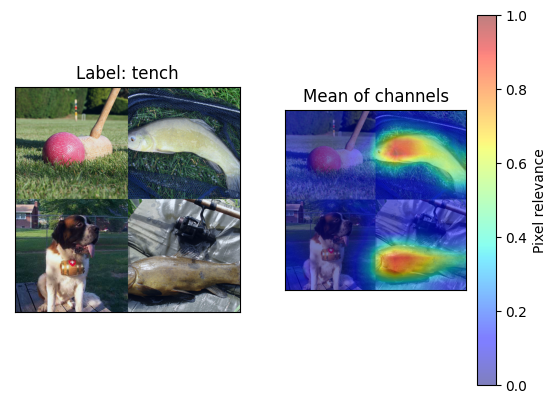

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.2786398341435516


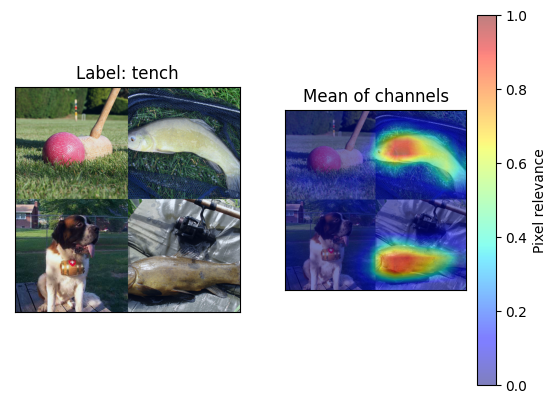

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.8518310486886247


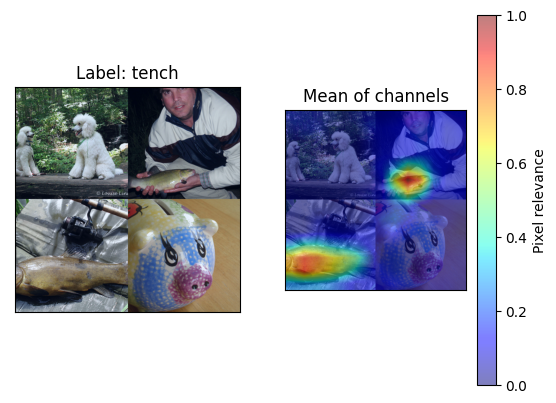

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.3011423377157231


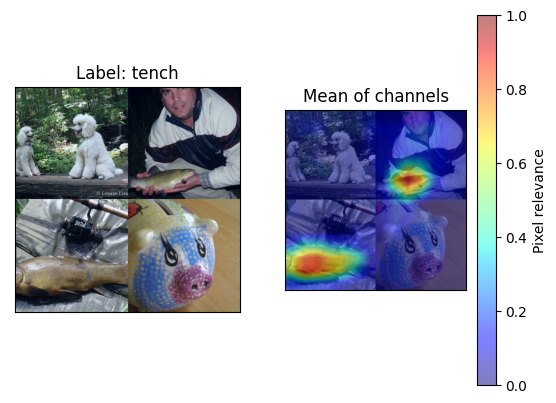

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.9096179294300644


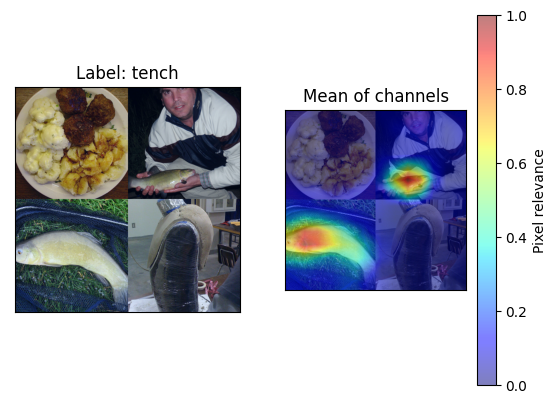

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.38076847973971073


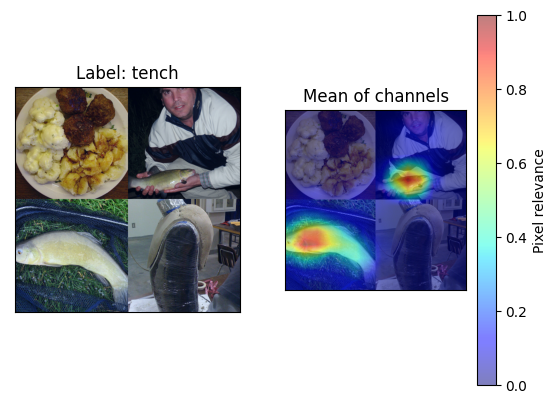

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: Siberian husky
Focus metric: 0.14677381181065166


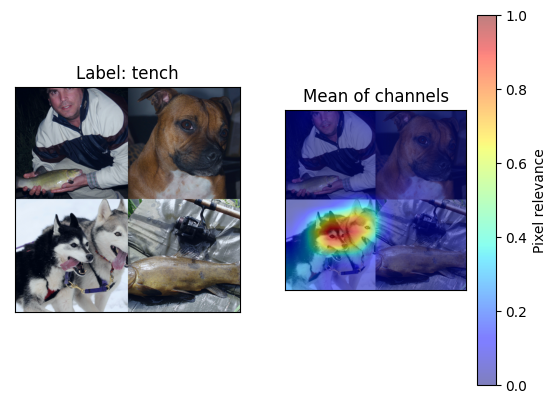

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: Siberian husky
Focus metric: 0.18505414413698168


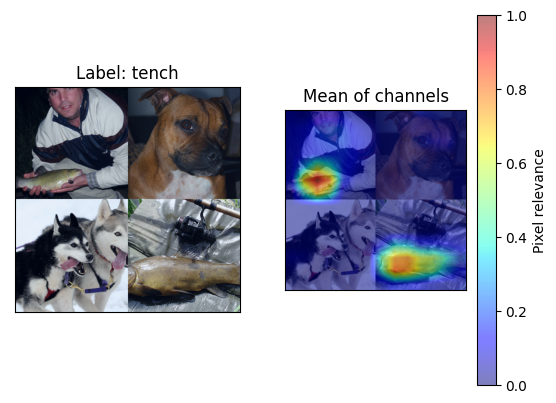

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.9587277059740207


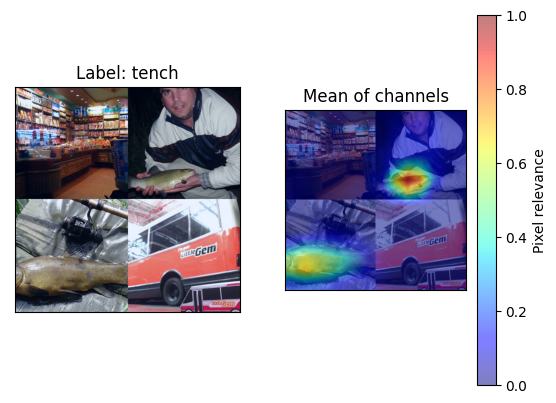

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.33716588684475524


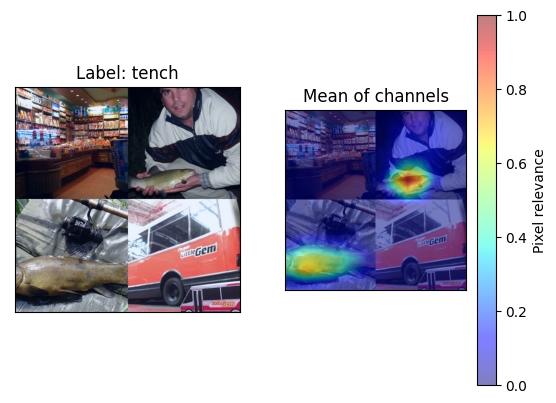

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.7671007988703279


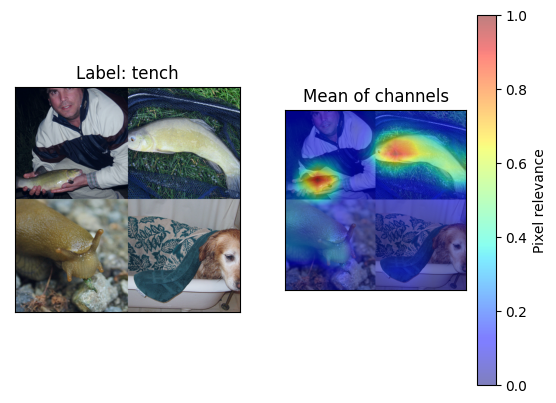

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.35343647499274256


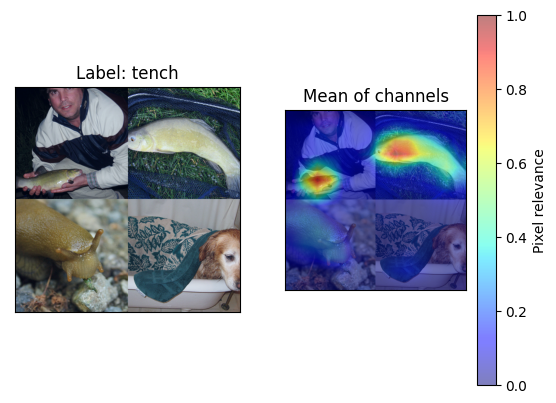

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.7858042354954419


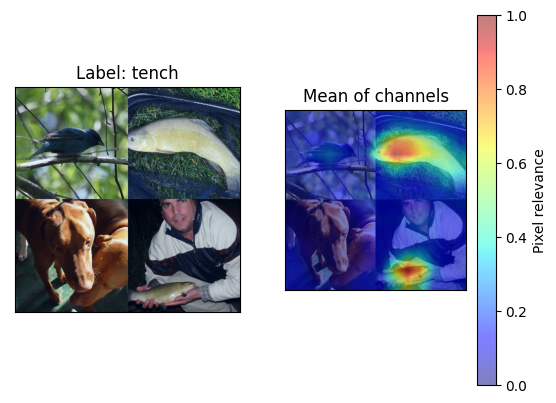

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.31752731166292464


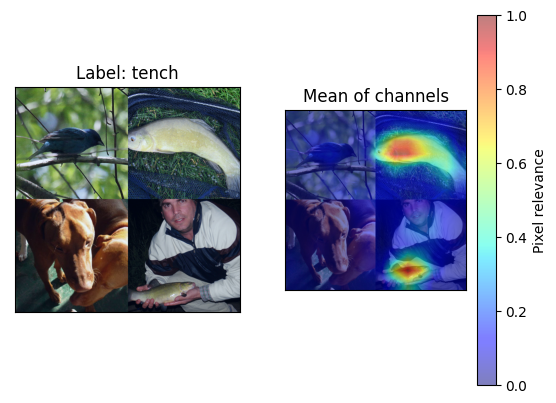

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.8630388434520452


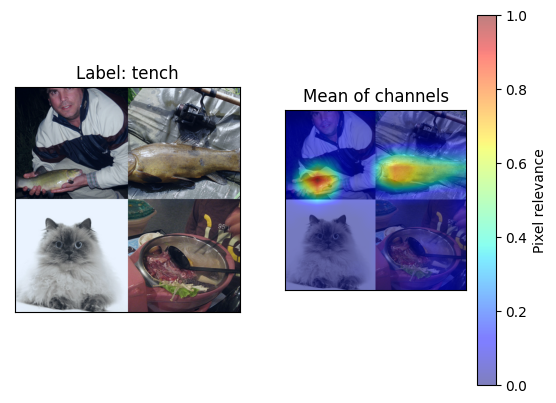

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.32174690816127477


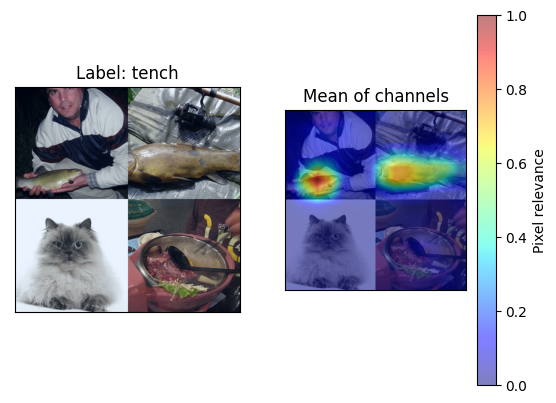

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.8732338442966806


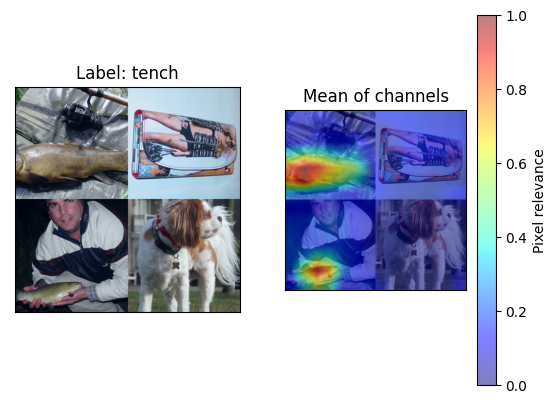

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.2796401778607093


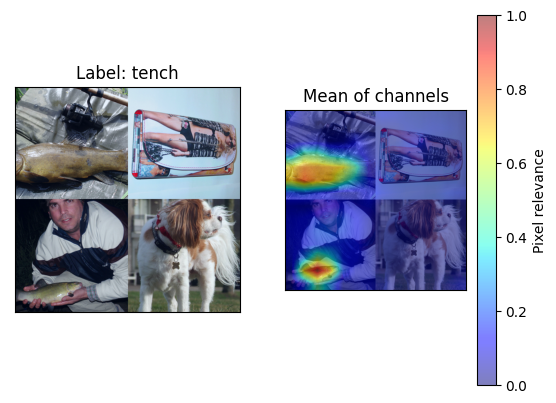

CV_LAYER_GRADCAM_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.9505520326772671


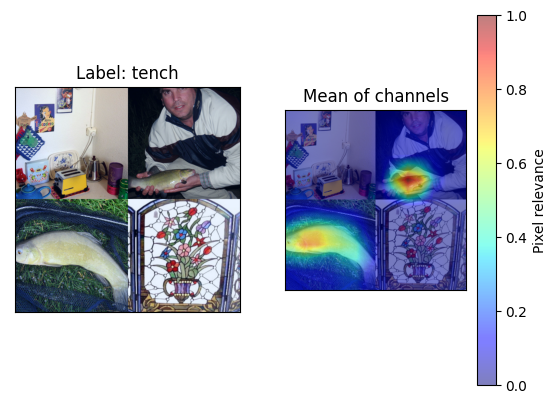

CV_LAYER_DEEPLIFT_EXPLAINER
tench
Mozaic classified as: tench
Focus metric: 0.4404025135439104


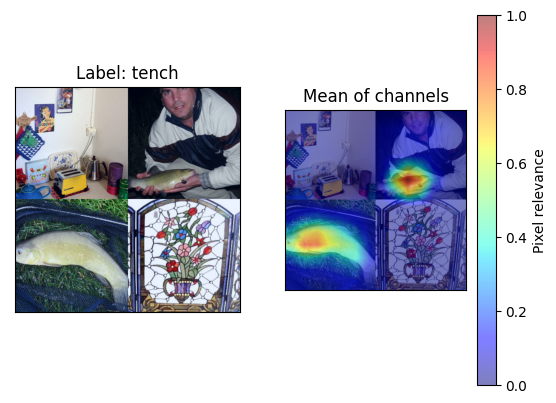

In [13]:
from foxai.metrics.focus import create_mosaics_from_images

from foxai.metrics.focus import focus
from foxai.visualizer import draw_image

import matplotlib.pyplot as plt

mosaics_num = 10
target_class = 0

for idx, mosaic_data in enumerate(create_mosaics_from_images(pictures, mosaics_num=mosaics_num, target_class=target_class)):

    category_name = categories[target_class]
    with FoXaiExplainer(
            model=model,
            explainers=[ExplainerWithParams(explainer_name=CVClassificationExplainers.CV_LAYER_GRADCAM_EXPLAINER, layer=layer),
                       ExplainerWithParams(explainer_name=CVClassificationExplainers.CV_LAYER_DEEPLIFT_EXPLAINER, layer=layer)],
            target=target_class,
    ) as xai_model:
        for explainer_name in ["CV_LAYER_GRADCAM_EXPLAINER", "CV_LAYER_DEEPLIFT_EXPLAINER"]:
            print(explainer_name)
            first_output, attributes_dict = xai_model(mosaic_data.mosaic_image)
            value = attributes_dict[explainer_name][0]

            print(category_name)
            print(f"Mozaic classified as: {categories[first_output.argmax().item()]}")
            print(f"Focus metric: {focus(attributions=value, mosaic_labels=mosaic_data.mosaic_labels, target_class=0)}")
            fig, axes = plt.subplots(nrows=1, ncols=2)
            draw_image(image=mosaic_data.mosaic_image[0], title=f"Label: {category_name}", ax=axes[0])
            mean_channels_visualization(attributions=value, transformed_img=mosaic_data.mosaic_image[0], title= f"Mean of channels", ax=axes[1])
            plt.show()